In [1]:
pip install XGboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [3]:
dataset = pd.read_csv(r"C:\Users\91900\Desktop\Train.csv")


In [4]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
dataset.shape

(10999, 12)

In [6]:
dataset.info

<bound method DataFrame.info of           ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   

In [7]:
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


([<matplotlib.patches.Wedge at 0x1b6d3fc8e30>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

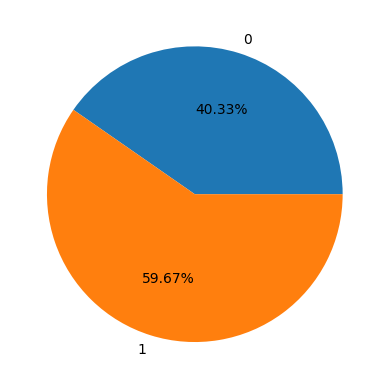

In [10]:
delay=pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')

In [11]:
data_v1 = dataset[dataset['Reached.on.Time_Y.N']==0]


Text(0, 0.5, 'percentage')

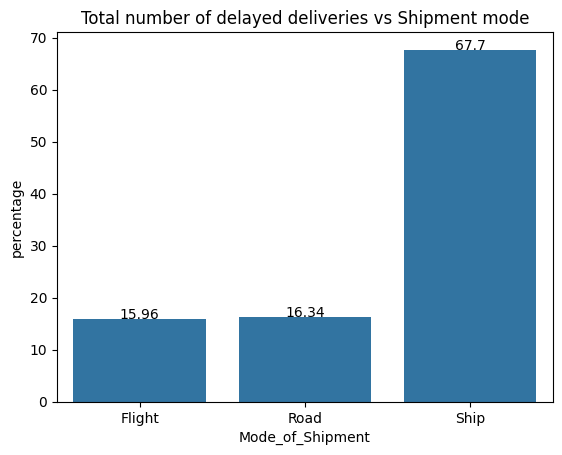

In [12]:
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

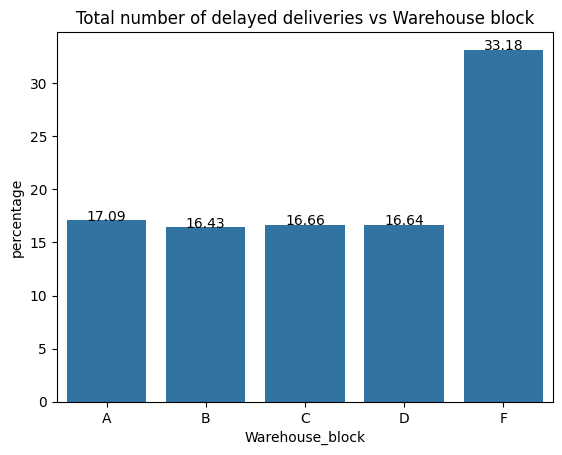

In [13]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x='Warehouse_block', y='ID', data=data_v3 )
for index, row in data_v3.iterrows():
   visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

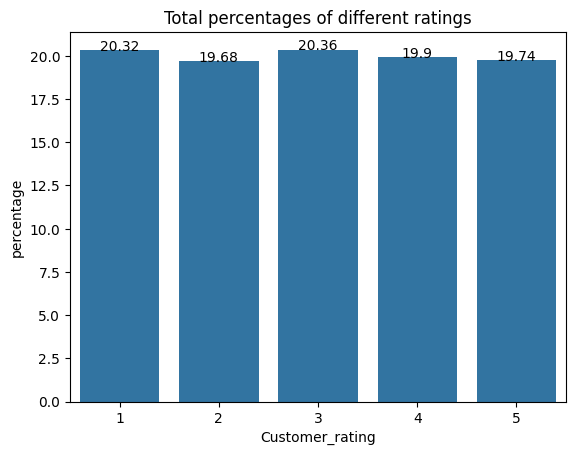

In [14]:
data_v4=pd.DataFrame((dataset.groupby(['Customer_rating'])['ID'].count())/len(dataset)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x='Customer_rating', y='ID', data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

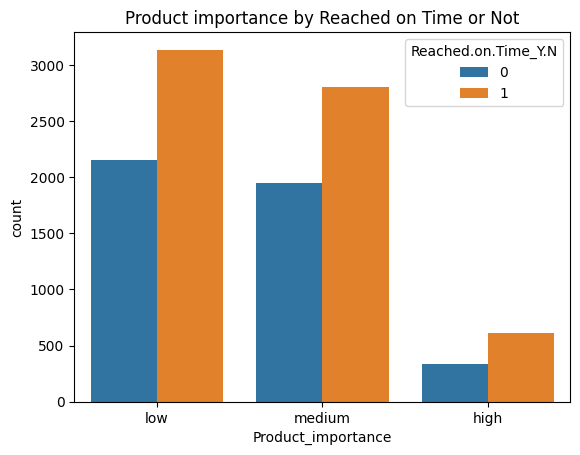

In [15]:
sns.countplot(x = "Product_importance", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Product importance by Reached on Time or Not")

Text(0.5, 1.0, 'Gender by Reached on Time or Not')

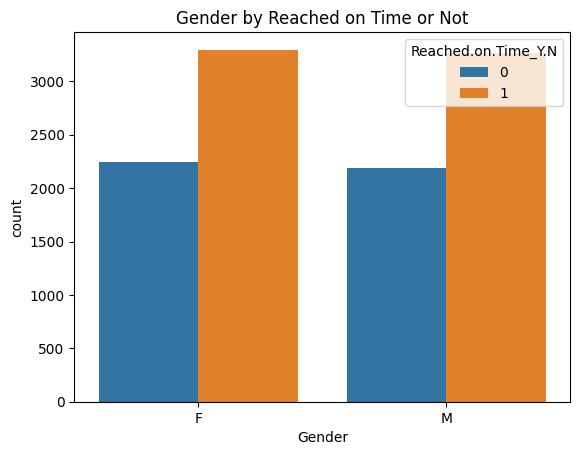

In [16]:
sns.countplot(x = "Gender", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Gender by Reached on Time or Not")

Text(0.5, 1.0, 'Warehouse block vs on Time or Not')

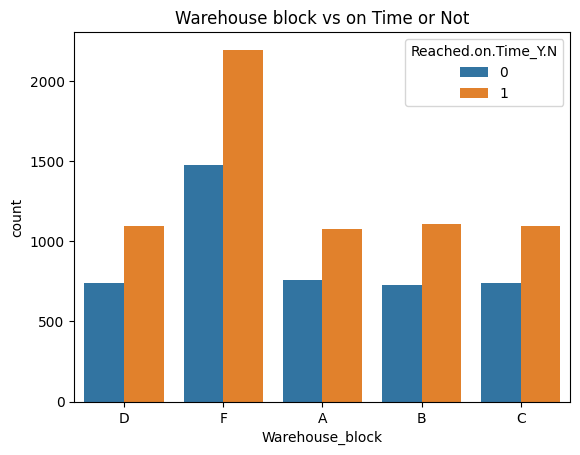

In [17]:
sns.countplot(x = "Warehouse_block", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Warehouse block vs on Time or Not")

Text(0.5, 1.0, 'Customer ratings by Gender')

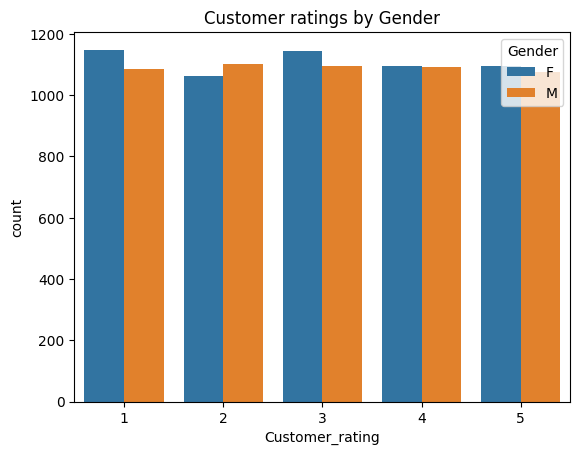

In [18]:
sns.countplot(x = "Customer_rating", data = dataset, hue="Gender")
plt.title("Customer ratings by Gender")

Text(0.5, 1.0, 'Amount spent by each Gender')

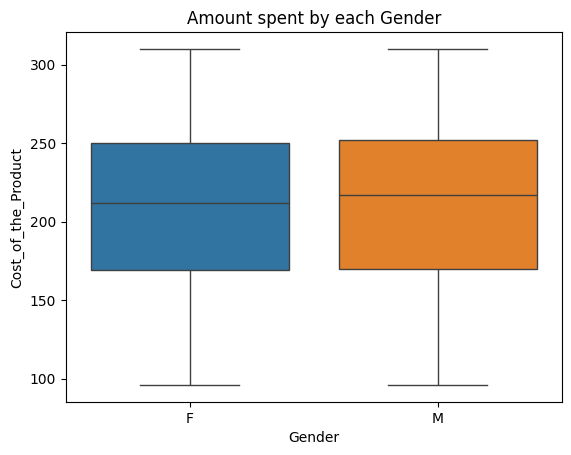

In [19]:
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=dataset,hue='Gender')
plt.title("Amount spent by each Gender")

Text(0.5, 1.0, 'Average cost of products of different importance')

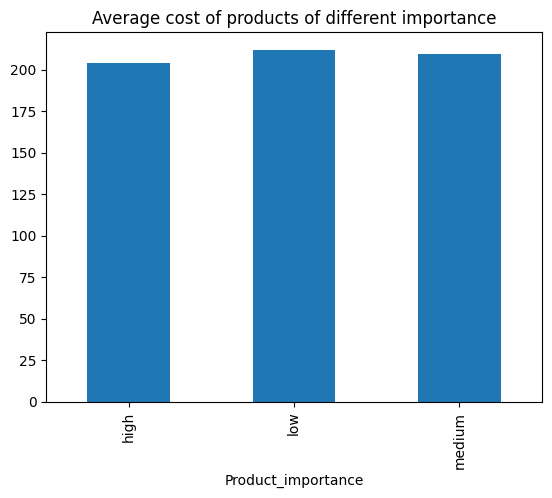

In [20]:
dataset.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")

In [21]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


array([[<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Prior_purchases'}>],
       [<Axes: title={'center': 'Discount_offered'}>,
        <Axes: title={'center': 'Weight_in_gms'}>]], dtype=object)

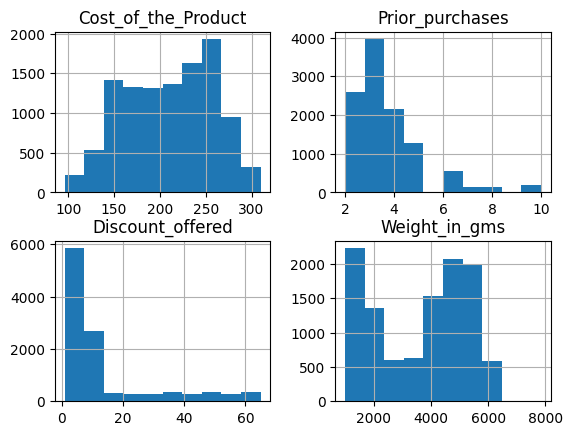

In [22]:
dataset[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()

In [23]:
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [24]:
#Warehouse_block
crossTab = pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [25]:
crossTab = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [26]:
crossTab = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [27]:
crossTab = pd.crosstab(data['Gender'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


In [28]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [29]:
data=pd.get_dummies(data,columns=['Product_importance'], drop_first=True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,D,Flight,4,2,177,3,F,44,1233,1,True,False
1,F,Flight,4,5,216,2,M,59,3088,1,True,False
2,A,Flight,2,2,183,4,M,48,3374,1,True,False
3,B,Flight,3,3,176,4,M,10,1177,1,False,True
4,C,Flight,2,2,184,3,F,46,2484,1,False,True


In [30]:
X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=data['Reached on Time']

In [31]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_low,Product_importance_medium
0,4,2,177,3,44,1233,True,False
1,4,5,216,2,59,3088,True,False
2,2,2,183,4,48,3374,True,False
3,3,3,176,4,10,1177,False,True
4,2,2,184,3,46,2484,False,True


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
   
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test  =pd.DataFrame(X_test,columns=X.columns)
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_low,Product_importance_medium
0,0.2,1.0,0.383178,0.125,0.093750,0.457852,1.0,0.0
1,0.8,0.5,0.495327,0.250,0.031250,0.510592,0.0,1.0
2,0.0,1.0,0.845794,0.125,0.078125,0.004529,0.0,1.0
3,0.6,1.0,0.574766,0.000,0.046875,0.480351,0.0,1.0
4,0.8,0.5,0.934579,0.250,0.046875,0.094814,1.0,0.0


In [34]:
#baselinesvm
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       895
           1       0.83      0.53      0.65      1305

    accuracy                           0.66      2200
   macro avg       0.69      0.69      0.66      2200
weighted avg       0.72      0.66      0.66      2200



In [35]:
#optimizedsvm
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='f1_weighted')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
optimized_svm_model = svm.SVC(**best_params)
optimized_svm_model.fit(X_train, y_train)

# Predict and evaluate the optimized model
y_pred_optimized = optimized_svm_model.predict(X_test)
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.57      0.77      0.66       895
           1       0.79      0.61      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.70      0.67      0.67      2200

[[687 208]
 [515 790]]


In [36]:
#baselinerf
baseline_rf_model = RandomForestClassifier()
baseline_rf_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred_baseline = baseline_rf_model.predict(X_test)
print("Baseline Matrix:")
print(classification_report(y_test, y_pred_baseline))

Baseline Matrix:
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.67      2200



In [37]:
#optimizedrf
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200

[[593 302]
 [432 873]]


In [38]:
#baselineknn
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       895
           1       0.72      0.67      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [39]:
#optimizedknn
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
optimized_knn_model = KNeighborsClassifier(**best_params)
optimized_knn_model.fit(X_train, y_train)

y_pred_optimized = optimized_knn_model.predict(X_test)
print("Optimized K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

Optimized K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60       895
           1       0.73      0.65      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.65      2200

[[581 314]
 [454 851]]


In [40]:
import pickle

In [42]:
pickle.dump(rf_model, open('rf_model_2.pk1','wb'))

In [43]:
pickle.dump(ms,open('bestmodel_2.pk1','wb'))